Data has been collected from four people. They are all Dutch so at the moment it is not possible to look closely at some of my original RQs. In any case, it is expected that there is a difference between how participants do the task between conditions 'gendered' and 'non-gendered' job titles.

This notebook will consolidate the data and do a few tests / visualizations. First I load needed packages. These are the ones from class, I don't use all of them... 

In [11]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import statistics as stats
import numpy as np
import pandas as pd
import os as os
import seaborn as seaborn

Now, I collect the data from the different files (x4) and process them into one master DF / csv file. I notice one col did not collect as needed, but fill it with a set of conditions in this stage as well. 

In [51]:
# create vector with all file names of all participants
file_names = ['2023-06-06_14-46-23_e_f_mich.csv', '2023-06-06_20-37-51_d_m_mart.csv', '2023-06-06_20-41-59_d_m_jaap.csv', '2023-06-06_20-51-12_d_f_marieke.csv']
# combine the four participants into one data file with new  col for name
combined_data = pd.DataFrame()
for file_name in file_names:
    participant = file_name[-8:-4]  
    data = pd.read_csv(file_name)
    # Add the participant column 
    data['participant'] = participant
    
    # add to combined data frame
    
    combined_data = pd.concat([combined_data,data], ignore_index=True)



# fill in still empty right or not col. 7 - this col has to do with wither an answer is right
combined_data['rightornot'] = combined_data.apply(lambda row: 1 if (row['gendered'] == 1 and
                                             ((row['value_col'] == 1 and row['key'] == 'y') or
                                              ((row['value_col'] == 2 or row['value_col'] == 3) and row['key'] == 'n'))) or
                                             (row['gendered'] == 0 and row['value_col'] in [1, 2] and row['key'] == 'y') or 
                                             (row['gendered'] == 0 and row['value_col'] == 3 and row['key'] == 'n') 
                               else 0, axis=1)


combined_data.to_csv('combined_data.csv', index=False)



let's look at how well the different participants got the answers right first using matplotlib, even though this isn't really a good metric because there is some debate perhaps about the use of these gendered job titles...? Anyhow, good to see who 'conforms' best to prescriptive norms.

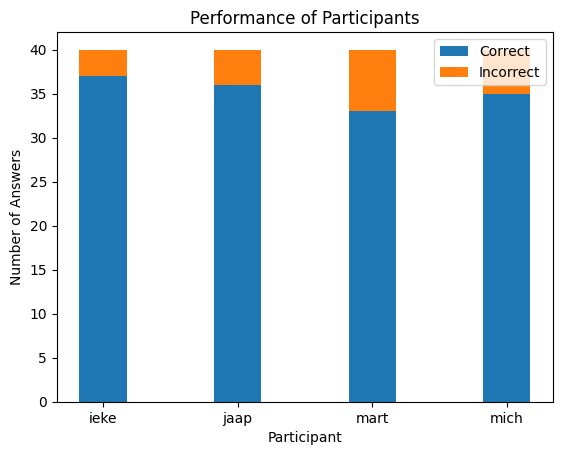

In [52]:
# Group the DataFrame by 'participant' and calculate the sum of 'rightornot' for each participant
grouped_data = combined_data.groupby('participant')['rightornot'].agg(['sum', 'count'])
grouped_data['incorrect'] = grouped_data['count'] - grouped_data['sum']

#grouped bar plot
x = grouped_data.index
width = 0.35
fig, ax = plt.subplots()
ax.bar(x, grouped_data['sum'], width, label='Correct')
ax.bar(x, grouped_data['incorrect'], width, label='Incorrect', bottom=grouped_data['sum'])
ax.set_xlabel('Participant')
ax.set_ylabel('Number of Answers')
ax.set_title('Performance of Participants')
ax.legend()
plt.show()


Let's take a boxplot look at the reaction times for each participant

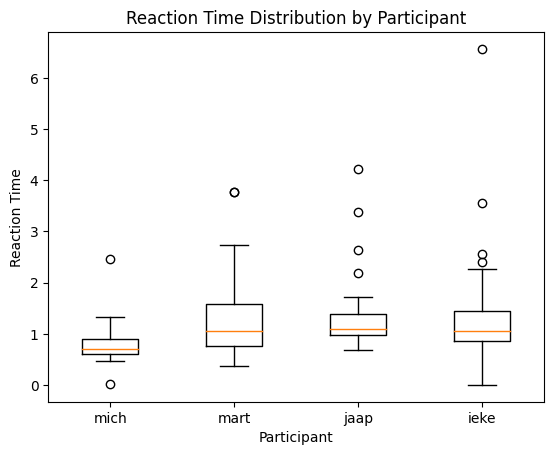

In [53]:
# Group the data 
grouped_data = combined_data.groupby('participant')['duration'].apply(list)

# Create a list 
data = [grouped_data[participant] for participant in combined_data['participant'].unique()]

# Create a box plott
plt.boxplot(data, labels=combined_data['participant'].unique())
plt.xlabel('Participant')
plt.ylabel('Reaction Time')
plt.title('Reaction Time Distribution by Participant')
plt.show()



What's the relationship between accuracy and word?

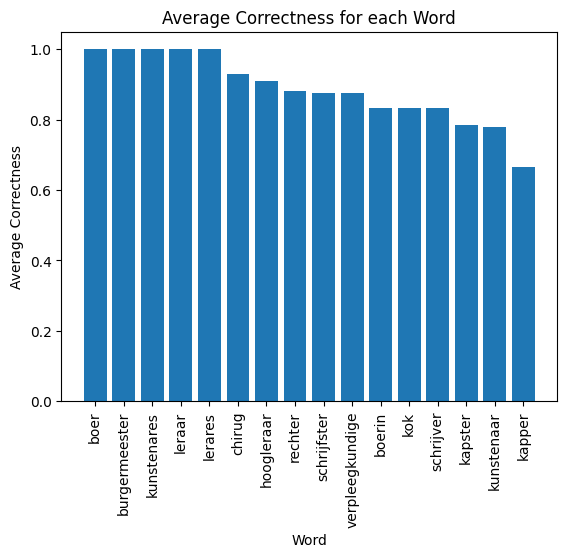

In [54]:
# correctness and reaction time for each unique word
word_stats = combined_data.groupby('word').agg({'rightornot': 'mean', 'duration': 'mean'})

# descending order
word_stats = word_stats.sort_values('rightornot', ascending=False)

#   bar chart
plt.bar(word_stats.index, word_stats['rightornot'])
plt.xlabel('Word')
plt.ylabel('Average Correctness')
plt.title('Average Correctness for each Word')
plt.xticks(rotation=90)
plt.show()


In which condition are most errors? 

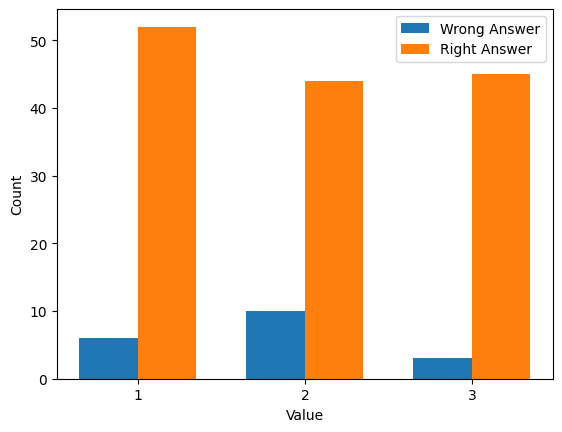

In [55]:

value_col = combined_data['value_col']
rightornot = combined_data['rightornot']

#  the occurrences of each combination
counts = combined_data.groupby(['value_col', 'rightornot']).size().unstack(fill_value=0)

# plot  grouped bar chart
x = np.arange(len(counts))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts[0], width, label='Wrong Answer')
rects2 = ax.bar(x + width/2, counts[1], width, label='Right Answer')

ax.set_xticks(x)
ax.set_xticklabels(counts.index)
ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.legend()

plt.show()


Let's look at some individual words, starting with rechter, our most often wrong word. What are people actually getting wrong? Which condition shows the most 'wrong' answers? The pie chart below shows for kapper which has the most wrong. it seems that wrong answers are equally split between the stimulus being the wrong gender and the stimulus being the wrong job. 

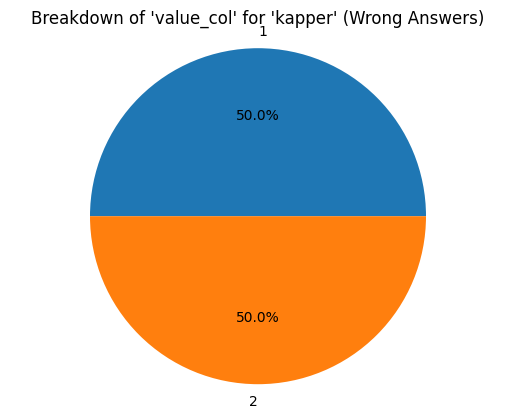

In [57]:
import matplotlib.pyplot as plt

# kapper and wrong answers (rightornot = 0)
filtered_data = combined_data[(combined_data['word'] == 'kapper') & (combined_data['rightornot'] == 0)]

# occurrences of each unique value in 'value_col'
value_counts = filtered_data['value_col'].value_counts()

#  the pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title("Breakdown of 'value_col' for 'kapper' (Wrong Answers)")
plt.axis('equal')
plt.show()


How about the reaction time - who had the highest reaction time? unsurprisingly mich (who had lots of practice) was faster, the other three were about the same. 

In [18]:
# average reaction time for right answers (rightornot = 1) and wrong answers (rightornot = 0)
participant_stats = combined_data.groupby(['participant', 'rightornot'])['duration'].mean()

#average reaction time for each value in 'value_col'
value_stats = combined_data.groupby('value_col')['duration'].mean()

# average reaction time for each condition in 'type' column
type_stats = combined_data.groupby('type')['duration'].mean()

# Print the statistics
print("Average reaction time for right and wrong answers:")
print(participant_stats)
print("\nAverage reaction time for each value in 'value_col':")
print(value_stats)
print("\nAverage reaction time for each condition in 'type' column:")
print(type_stats)


Average reaction time for right and wrong answers:
participant  rightornot
ieke         0             1.346016
             1             1.353439
jaap         0             1.359673
             1             1.307324
mart         0             1.243711
             1             1.245128
mich         0             0.739473
             1             0.811268
Name: duration, dtype: float64

Average reaction time for each value in 'value_col':
value_col
1    0.988446
2    1.342119
3    1.219417
Name: duration, dtype: float64

Average reaction time for each condition in 'type' column:
type
image    1.273338
sound    1.080866
Name: duration, dtype: float64


Interesting. Let's do some inferential stats, starting with the last of these above. It makes sense that the sound condition should have a lower reaction time. The stimulus is provided first and allows thinking time to think of the job title. Is this statistically significant though? Turns out, it is not. 

In [20]:
condition1 = combined_data.loc[combined_data['type'] == 'image', 'duration']
condition2 = combined_data.loc[combined_data['type'] == 'sound', 'duration']

#independent t-test
t_statistic, p_value = stats.ttest_ind(condition1, condition2)

#the difference is statistically significant?
print(t_statistic)
print(p_value)


1.5370792399411068
0.12627408690622677


What about participant reaction time? Can I run an anova for the four participants (and an post hoc if necessary) to see if the participants reacted significantly faster or slower than each other?

In [21]:
participants = combined_data['participant'].unique()
participant_data = []

for participant in participants:
    participant_data.append(combined_data.loc[combined_data['participant'] == participant, 'duration'])

#  one-way ANOVA
f_statistic, p_value = stats.f_oneway(*participant_data)

print(f_statistic)
print(p_value) 

4.598330616526463
0.004105371567531623


post hoc is in order - this solution (below) was suggested by internet. There is no difference between the three 'true' participants. Mich shows significant results but this is practice effect. 

In [64]:
import statsmodels.stats.multicomp as mc

# Perform Tukey's HSD test
tukey_result = mc.MultiComparison(combined_data['duration'], combined_data['participant']).tukeyhsd()

# Print the summary of the post-hoc test
print(tukey_result.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  ieke   jaap  -0.0314 0.9978 -0.4783  0.4156  False
  ieke   mart  -0.1071 0.9249  -0.554  0.3399  False
  ieke   mich  -0.5602 0.0075 -1.0072 -0.1133   True
  jaap   mart  -0.0757 0.9714 -0.5226  0.3712  False
  jaap   mich  -0.5289 0.0132 -0.9758  -0.082   True
  mart   mich  -0.4532 0.0455 -0.9001 -0.0063   True
----------------------------------------------------


In the data we also have conditions in column 'gendered'.  1 means a word like schrijver / schrijfster where there are two terms that are widely used (if not always). A perhaps stronger example is Kapper / Kapster. 0 is for words in which there is generally only one term used regardless of gender, e.g. kok, chirug. Let's look at the reaction time for these two types. It appears that there is indeed a marked difference in how accurate everyone was.  

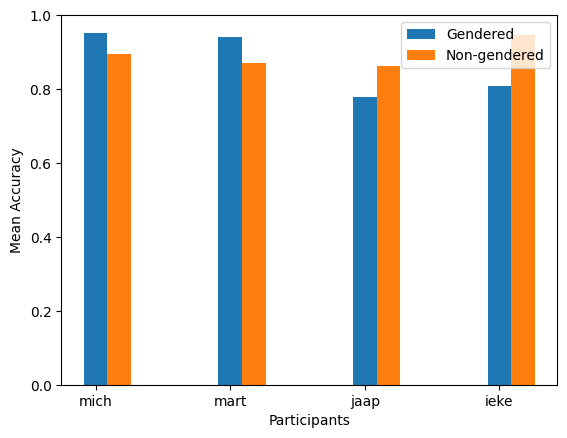

In [65]:
# Group the data by 'participants' and 'gendered' and calculate the mean of 'rightornot'
grouped_data = combined_data.groupby(['participant', 'gendered'])['rightornot'].mean().unstack()

# Get the participant names and genders
participants = combined_data['participant'].unique()
genders = combined_data['gendered'].unique()

# Set the width of each bar and the positions of the x-axis ticks
width = 0.35
x = np.arange(len(participants))

# Plot the grouped bar chart
fig, ax = plt.subplots()
for i, gender in enumerate(genders):
    ax.bar(x + i*width/len(genders), grouped_data[gender], width/len(genders), label='Gendered' if gender == 1 else 'Non-gendered')

# Set the x-axis labels, y-axis label, and the legend
ax.set_xlabel('Participants')
ax.set_ylabel('Mean Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(participants)
ax.legend()

# Show the plot
plt.show()


Which words exactly are giving the participants the most grief? There are five non-gendered professions included. Which ones are they getting wrong most often? both burgermeester and rechter are more often than not wrong. 

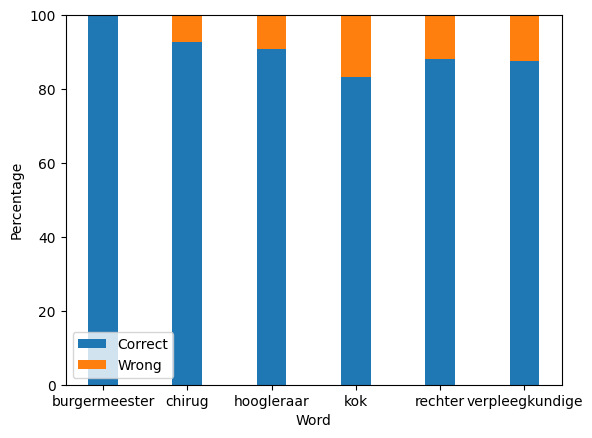

In [66]:
import matplotlib.pyplot as plt

# rows with gendered value 0
filtered_data = combined_data[combined_data['gendered'] == 0]

#  data by 'word' and calculate the mean of 'rightornot'
grouped_data = filtered_data.groupby('word')['rightornot'].mean()

#  the percentage of correct and wrong answers
correct_percentage = grouped_data * 100
wrong_percentage = (1 - grouped_data) * 100

#bar chart
fig, ax = plt.subplots()
x = grouped_data.index
width = 0.35

ax.bar(x, correct_percentage, width, label='Correct')
ax.bar(x, wrong_percentage, width, bottom=correct_percentage, label='Wrong')

ax.set_xlabel('Word')
ax.set_ylabel('Percentage')
ax.legend()

plt.show()


how does this look if we pull sound and image conditions apart?

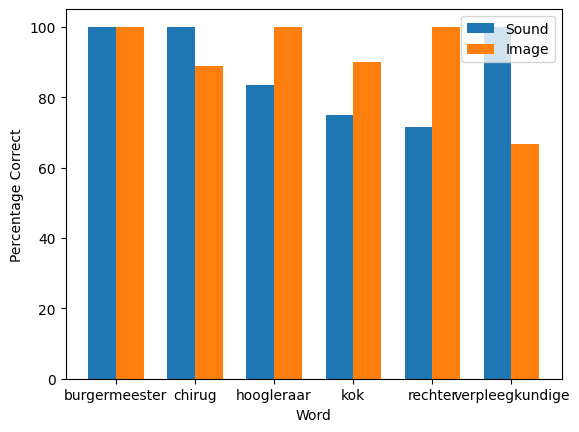

In [67]:
# rows with gendered value 0
filtered_data = combined_data[combined_data['gendered'] == 0]

#  data by 'word' and 'type' and calculate the mean of 'rightornot'
grouped_data = filtered_data.groupby(['word', 'type'])['rightornot'].mean()

# Get the unique words and types
words = sorted(filtered_data['word'].unique())
types = sorted(filtered_data['type'].unique())

#  empty lists 
correct_percentages_sound = []
correct_percentages_image = []

#  the percentage of correct answers for each word and type
for word in words:
    try:
        correct_percentages_sound.append(grouped_data[word]['sound'] * 100)
    except KeyError:
        correct_percentages_sound.append(0)

    try:
        correct_percentages_image.append(grouped_data[word]['image'] * 100)
    except KeyError:
        correct_percentages_image.append(0)

#  the percentages to numpy arrays
correct_percentages_sound = np.array(correct_percentages_sound)
correct_percentages_image = np.array(correct_percentages_image)

#  the bar chart
fig, ax = plt.subplots()
x = np.arange(len(words))
width = 0.35

ax.bar(x - width/2, correct_percentages_sound, width, label='Sound')
ax.bar(x + width/2, correct_percentages_image, width, label='Image')


ax.set_xticks(x)
ax.set_xticklabels(words)
ax.set_xlabel('Word')
ax.set_ylabel('Percentage Correct')
ax.legend()

plt.show()


are these significantly different? using chi square - nope. 

In [68]:
from scipy.stats import chi2_contingency

# table
contingency_table = pd.crosstab(combined_data.loc[combined_data['gendered'] == 0, 'word'], combined_data.loc[combined_data['gendered'] == 0, 'rightornot'])

# chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(chi2_stat)
print(p_value)


1.776329327799916
0.8791467081740453


What's the average reaction time for these words? It seems like the ones that are the trickiest to get right also have a lower average reaction time. 

In [69]:
filtered_data = combined_data[combined_data['gendered'] == 0]
average_reaction_time = filtered_data.groupby('word')['duration'].mean()
print(average_reaction_time)


word
burgermeester      0.918534
chirug             1.417555
hoogleraar         0.915265
kok                1.290583
rechter            0.858413
verpleegkundige    1.189254
Name: duration, dtype: float64


Are these significantly different though? Nope.

In [70]:
from scipy.stats import f_oneway

word_0 = combined_data.loc[combined_data['gendered'] == 0, 'duration']
other_words = combined_data.loc[combined_data['gendered'] != 0, 'duration']

# ANOVA
f_statistic, p_value = f_oneway(word_0, other_words)

print(f_statistic)
print(p_value)


0.8020269734076841
0.37185036935155924


In sum, with so little data, it is hard to see any particular pattern, but similar analyses could be run with a larger pool and across L1 / L2 boundaries. 